In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree

In [5]:
df=pd.read_csv("C:/Users/aadhy/Documents/5th Sem/ML/assignment/tested.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)
df.drop('Cabin', axis=1,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
df= df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [9]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,0
1,1,3,0,47.00000,1,0,7.0000,1
2,0,2,1,62.00000,0,0,9.6875,0
3,0,3,1,27.00000,0,0,8.6625,1
4,1,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,1
414,1,1,0,39.00000,0,0,108.9000,2
415,0,3,1,38.50000,0,0,7.2500,1
416,0,3,1,30.27259,0,0,8.0500,1


In [10]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,0
1,3,0,47.00000,1,0,7.0000,1
2,2,1,62.00000,0,0,9.6875,0
3,3,1,27.00000,0,0,8.6625,1
4,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,1
414,1,0,39.00000,0,0,108.9000,2
415,3,1,38.50000,0,0,7.2500,1
416,3,1,30.27259,0,0,8.0500,1


In [11]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
1.LOGISTIC REGRESSION

In [13]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

C:\Users\aadhy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [14]:
y_pred = LR.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, y_pred))

Accuracy:  1.0


In [15]:
y_pred_LR = LR.predict(X_test)
LR.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [16]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))

Accuracy:  1.0


In [ ]:
2.LINEAR REGRESSION

In [18]:
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

1.0

In [ ]:
3.KNN CLASSIFIER

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [22]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

Accuracy:  0.6190476190476191


In [ ]:
4.DECISION TREE

In [24]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [25]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))

Accuracy:  1.0


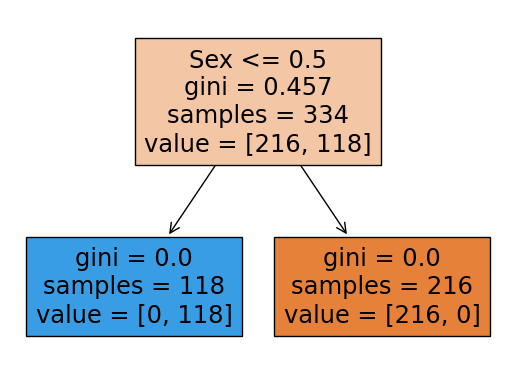

In [28]:
plot_tree(tree, filled=True, feature_names=list(X.columns)) 
plt.show()

In [ ]:
5.MULTILINEAR PERCEPTRON CLASSIFIER

In [29]:
clf=MLPClassifier(random_state=1,max_iter=300).fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

C:\Users\aadhy\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [30]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  1.0
